In [ ]:
import pandas as pd

# Assuming your file is in XLSX format and uploaded to Colab
from google.colab import files
uploaded = files.upload()


Saving Vehicle Sales Data.xlsx - siaaa.csv to Vehicle Sales Data.xlsx - siaaa (1).csv


## **Step 1 : Load Dataset**

In [ ]:
# Load dataset
df = pd.read_csv('Vehicle Sales Data.xlsx - siaaa.csv')
df.head()

,Vehicle Full Code,Vehicle Code,OEM Model Name,SIAM Company Code,SIAM Segment 1,SIAM Segment 2,SIAM Fuel,Month,Year,Production Qty,Domestic Sale,Export Sale,Category,Category Name,YrMth
0,HMPVF2U4DI,PV,PAJRO SFX,HINDUSTAN MOTORS LTD,SUV,UV4:,DIESEL,NOV,2012,0,0,0,PVUV,Utility vehicles PV,01-11-2012
1,HMORF2U4DI,OR,OUTLANDER,HINDUSTAN MOTORS LTD,SUV,UV4:,DIESEL,NOV,2012,0,0,0,PVUV,Utility vehicles PV,01-11-2012
2,SKOAP3EEDI,OA,Octavia,SKODAAUTO INDIA PVT LTD,Premium Car 3,Executive,DIESEL,NOV,2012,0,0,0,PVPC,Passenger car PV,01-11-2012
3,HMORF2U4PT,OR,OUTLANDER,HINDUSTAN MOTORS LTD,SUV,UV4:,PETROL,NOV,2012,0,6,0,PVUV,Utility vehicles PV,01-11-2012
4,FMTXF1U3PT,TX,Trax,FORCE MOTORS LTD,MPV,UV3,PETROL,MAY,2012,0,0,0,PVUV,Utility vehicles PV,01-05-2012


#### **1.1 Check for Missing Values**

In [ ]:
df.isnull().sum()

,0
Vehicle Full Code,0
Vehicle Code,0
OEM Model Name,0
SIAM Company Code,0
SIAM Segment 1,12
SIAM Segment 2,0
SIAM Fuel,18
Month,0
Year,0
Production Qty,0


### **1.1.1 Fill the Category and Category Name**

Creates a mapping for categories based on segment combinations (SIAM Segment 1 & SIAM Segment 2), and fills missing Category information using this mapping.

In [ ]:
# Standardize columns to uppercase and remove extra spaces
df['SIAM Segment 1'] = df['SIAM Segment 1'].str.upper().str.strip()
df['SIAM Segment 2'] = df['SIAM Segment 2'].str.upper().str.strip()
df['Category'] = df['Category'].str.upper().str.strip()
df['Category Name'] = df['Category Name'].str.upper().str.strip()


# Create a dictionary for Category and Category Name based on unique combinations
mapping_dict = df.dropna(subset=['Category', 'Category Name']).drop_duplicates(subset=['SIAM Segment 1', 'SIAM Segment 2']).set_index(['SIAM Segment 1', 'SIAM Segment 2'])[['Category', 'Category Name']].to_dict(orient='index')

# Function to fill missing values
def fill_category(row):
    key = (row['SIAM Segment 1'], row['SIAM Segment 2'])
    if pd.isna(row['Category']) and key in mapping_dict:
        row['Category'] = mapping_dict[key]['Category']
    if pd.isna(row['Category Name']) and key in mapping_dict:
        row['Category Name'] = mapping_dict[key]['Category Name']
    return row

# Apply the function row-wise
df = df.apply(fill_category, axis=1)

# Check for remaining missing values
print(df[['Category', 'Category Name']].isnull().sum())



Category         0
Category Name    0
dtype: int64


### **1.1.2 Fill in the SIAM Fuel Column**

Creates a mapping based on the last two characters of the Vehicle Full Code, and fills in the missing values of SIAM Fuel column.

In [ ]:
# Create a mapping based on the last two characters of the Vehicle Full Code
fuel_mapping = {
    'PT': 'Petrol',
    'DI': 'Diesel',
    'CN': 'CNG',
    'EC': 'Electric',
    'HY': 'Hybrid',
    'LPG': 'LP'
}

def map_fuel(vehicle_code):
    last_two_chars = vehicle_code[-2:].upper()  # Get the last two characters and convert to uppercase
    return fuel_mapping.get(last_two_chars, None)  # Return the mapped value or None

# Apply the mapping function to fill missing values in SIAM Fuel
df['SIAM Fuel'] = df['SIAM Fuel'].fillna(df['Vehicle Full Code'].apply(map_fuel))

# Check for remaining missing values in SIAM Fuel
print(pd.Series(df['SIAM Fuel'].isnull().sum(), index=['SIAM Fuel']))



SIAM Fuel    0
dtype: int64


**1.1.3 Remove the missing values in the SIAM Segment 1 Column**

In [ ]:
# Remove rows with missing values in SIAM Segment 1
df = df.dropna(subset=['SIAM Segment 1'])
print(pd.Series(df['SIAM Segment 1'].isnull().sum(), index=['SIAM Segment 1']))


SIAM Segment 1    0
dtype: int64


#### **1.2 Descriptive Statistics**

In [ ]:
# Summary of numerical columns
print("Descriptive Statistics:")
print(df.describe())


Descriptive Statistics:
               Year
count  19654.000000
mean    2015.258065
std        2.290920
min     2012.000000
25%     2013.000000
50%     2015.000000
75%     2017.000000
max     2019.000000


#### **1.3 Unique Value Counts for Categorical Columns (check consistency)**

In [ ]:
# Count the unique values in 'SIAM Company Code'
fuel_counts = df['SIAM Fuel'].value_counts().reset_index()

# Rename columns for better understanding
fuel_counts.columns = ['SIAM Fuel', 'Count']

# Display the DataFrame
fuel_counts


,SIAM Fuel,Count
0,DIESEL,9685
1,PETROL,8172
2,LPG,860
3,CNG,470
4,HYBRID,361
5,ELECTRIC,88
6,Diesel,18


In [ ]:
print("Unique values in 'SIAM Segment 1':", df['SIAM Segment 1'].unique())
print("Unique values in 'SIAM Segment 2':", df['SIAM Segment 2'].unique())

Unique values in 'SIAM Segment 1': ['SUV' 'PREMIUM CAR 3' 'MPV' 'D' 'E' 'C+' 'C' 'B+' 'B' 'A' 'A LOW'
 'PREMIUM CARS 1']
Unique values in 'SIAM Segment 2': ['UV4:' 'EXECUTIVE' 'UV3' 'UV2' 'MID-SIZE' 'B' 'PREMIUM:' 'COMPACT:'
 'UV5:' 'V1:' 'UV1' 'V2:' 'SUPER COMPACT' 'MINI:' 'MICRO']


In [ ]:
# Data types and quick range check
print("Data types and non-null counts:")
print(df.info())


Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
Index: 19654 entries, 0 to 19665
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Vehicle Full Code  19654 non-null  object
 1   Vehicle Code       19654 non-null  object
 2   OEM Model Name     19654 non-null  object
 3   SIAM Company Code  19654 non-null  object
 4   SIAM Segment 1     19654 non-null  object
 5   SIAM Segment 2     19654 non-null  object
 6   SIAM Fuel          19654 non-null  object
 7   Month              19654 non-null  object
 8   Year               19654 non-null  int64 
 9   Production Qty     19654 non-null  object
 10  Domestic Sale      19654 non-null  object
 11  Export Sale        19654 non-null  object
 12  Category           19654 non-null  object
 13  Category Name      19654 non-null  object
 14  YrMth              19654 non-null  object
dtypes: int64(1), object(14)
memory usage: 2.4+ MB
None


#### **1.4 Highlight Anomalies**

In [ ]:
# Convert to numeric, setting errors='coerce' to convert non-numeric values to NaN
df['Domestic Sale'] = pd.to_numeric(df['Domestic Sale'], errors='coerce')

# Check for any NaN values created during conversion
print(df['Domestic Sale'].isnull().sum())

# Now calculate the Z-Score
df['Z-Score'] = (df['Domestic Sale'] - df['Domestic Sale'].mean()) / df['Domestic Sale'].std()

# Define a threshold for anomalies
threshold = 3
anomalies = df[abs(df['Z-Score']) > threshold]

print(anomalies)


4608
      Vehicle Full Code Vehicle Code  OEM Model Name  \
57           SKRDCCMSDI           RD           Rapid   
123          MSERF1U1PT           ER          Ertiga   
124          MSGYF1U1PT           GY           Gypsy   
132          GMTVF1U2DI           TV          Tavera   
172          MSAROBMIPT           AR          A-Star   
...                 ...          ...             ...   
19519        FIEVF2U4DI           EV       Endeavour   
19530        MMJBF1V2DI           JB           JEETO   
19571        VIPOBBCTPT           PO            Polo   
19584        NMDOOBCTPT           DO  Datsun Redi-GO   
19609        TMTCBBCTDI           TC           TIAGO   

                  SIAM Company Code SIAM Segment 1 SIAM Segment 2 SIAM Fuel  \
57          SKODAAUTO INDIA PVT LTD             C+       MID-SIZE    DIESEL   
123         MARUTI SUZUKI INDIA LTD            MPV            UV1    PETROL   
124         MARUTI SUZUKI INDIA LTD            MPV            UV1    PETROL   
132   

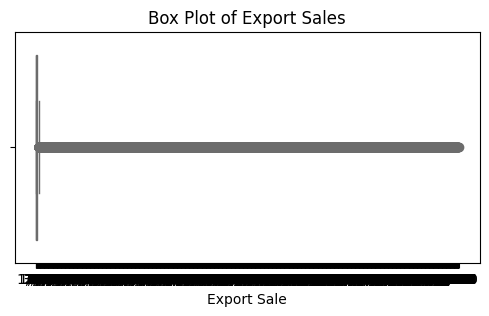

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 3))
sns.boxplot(x=df['Export Sale'])
plt.title('Box Plot of Export Sales')
plt.show()


### **Key Observations:**

**Extreme Outliers:** There are numerous extreme outliers present in the data. These are represented by the dots extending far beyond the whiskers of the box plot.

**Narrow Interquartile Range (IQR):** The IQR, represented by the box, is very narrow. This indicates that the middle 50% of the data is tightly clustered.







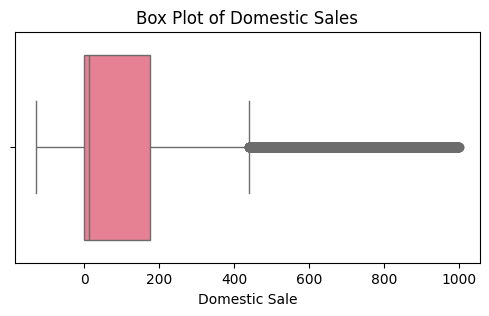

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df = df.reset_index(drop=True)
plt.figure(figsize=(6, 3))
sns.boxplot(x=df['Domestic Sale'])
plt.title('Box Plot of Domestic Sales')
plt.show()


### **Key Observations:**

**Extreme Outlier:** There is a single, very large outlier point located far to the right of the box plot. This indicates an extreme value that is significantly larger than the rest of the data points.

**Skewness:** The box plot appears to be slightly skewed to the right. This suggests that the distribution of Domestic Sales values is not perfectly symmetrical and has a longer tail towards the higher end.



# **Step 2: Perform Basic EDA and Check for Anomalies**

<Figure size 500x200 with 0 Axes>

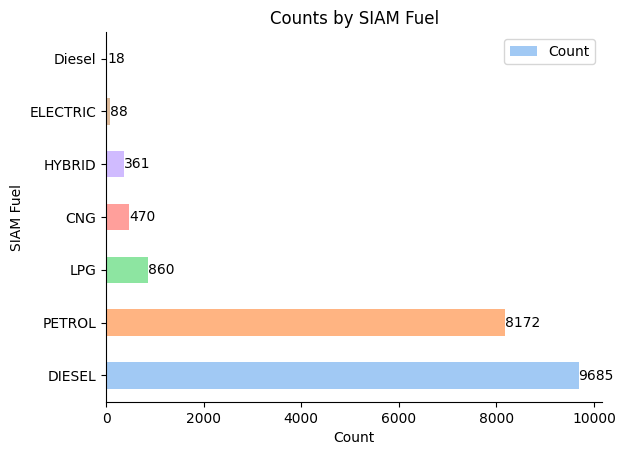

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Create a horizontal bar plot with different colors for each bar
plt.figure(figsize=(5, 2))
colors = sns.color_palette('pastel', n_colors=len(fuel_counts))

# Specify 'x' and 'y' in the plot function
fuel_counts.plot(kind='barh', x='SIAM Fuel', y='Count', color=colors) # Changed line

# Annotate each bar with its count value
for index, value in enumerate(fuel_counts['Count']): # Changed line
    plt.text(value, index, str(value), va='center')  # Position text at the end of each bar

# Remove unnecessary spines for a cleaner look
plt.gca().spines[['top', 'right']].set_visible(False)

# Add labels and title
plt.xlabel('Count')
plt.ylabel('SIAM Fuel')
plt.title('Counts by SIAM Fuel')
plt.show()

### **Insights**
1.   Diesel vehicles dominate the market, followed by Petrol.
2.   Electric and Hybrid vehicles are present in much smaller numbers.


### Category Name

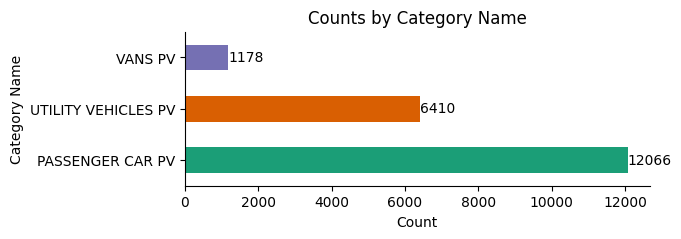

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Group by 'Category Name' and calculate the size
category_counts = df.groupby('Category Name').size()

# Create a horizontal bar plot
plt.figure(figsize=(6, 2))
category_counts.plot(kind='barh', color=sns.color_palette('Dark2'))

# Annotate each bar with its count value
for index, value in enumerate(category_counts):
    plt.text(value, index, str(value), va='center')  # Position text at the end of each bar

# Remove unnecessary spines for a cleaner look
plt.gca().spines[['top', 'right']].set_visible(False)

# Display the plot
plt.xlabel('Count')
plt.ylabel('Category Name')
plt.title('Counts by Category Name')
plt.show()


### **Insights**
1. Passenger Cars dominate the market with over 12,000 units.
2. Utility Vehicles have a significant presence with over 6,000 units.
3. Vans have the lowest market share with around 1,200 units.

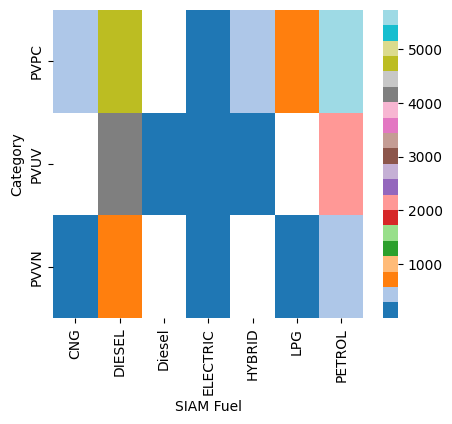

In [ ]:
# @title SIAM Fuel vs Category

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(5,4))
df_2dhist = pd.DataFrame({
    x_label: grp['Category'].value_counts()
    for x_label, grp in df.groupby('SIAM Fuel')
})
sns.heatmap(df_2dhist, cmap='tab20')
plt.xlabel('SIAM Fuel')
_ = plt.ylabel('Category')

### **Insights**
1. Passenger Cars (PVC) have the highest representation in Diesel, Petrol, and CNG fuel types.
2. Utility Vehicles (PUV) have a significant presence in Diesel and Petrol fuel types.
3. Vans (PVN) are primarily Diesel and Petrol vehicles.
4. Electric and Hybrid vehicles are present in all categories but have lower counts compared to traditional fuels.

<ipython-input-17-cccb5a6ed970>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Year', y='SIAM Fuel', inner='box', palette='Dark2')


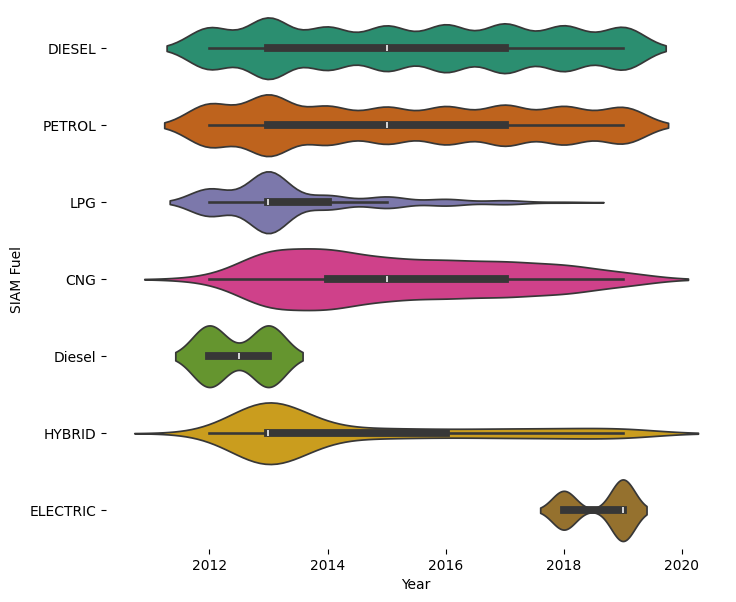

In [ ]:
# @title SIAM Fuel vs Year

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (8, 1 * len(df['SIAM Fuel'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Year', y='SIAM Fuel', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

### **Insights**
1. Electric and Hybrid vehicles are present in smaller numbers but are becoming recent trends and increasing over time.
2. Diesel and Petrol show a decreasing trend over the years.
3. CNG and LPG have a slight increasing trend.

### Sales (Domestic + Export) by Category Over Years

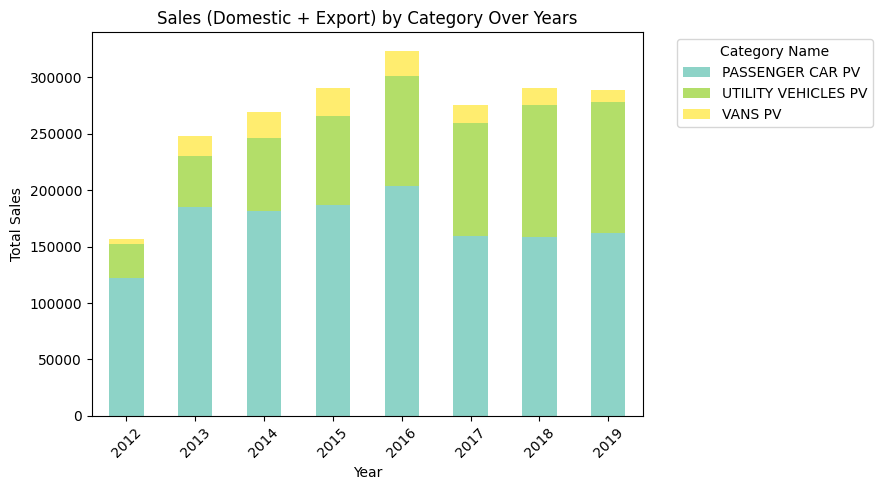

In [ ]:
# Convert 'Domestic Sale' and 'Export Sale' to numeric
df['Domestic Sale'] = pd.to_numeric(df['Domestic Sale'], errors='coerce')
df['Export Sale'] = pd.to_numeric(df['Export Sale'], errors='coerce')

# Drop any rows where 'Year', 'Category Name', 'Domestic Sale', or 'Export Sale' are missing
df.dropna(subset=['Year', 'Category Name', 'Domestic Sale', 'Export Sale'], inplace=True)

# Calculate total sales (Domestic + Export) for each category and year
df['Total Sales'] = df['Domestic Sale'] + df['Export Sale']
category_year_sales = df.groupby(['Year', 'Category Name'])['Total Sales'].sum().unstack().fillna(0)

# Plotting
category_year_sales.plot(kind='bar', stacked=True, figsize=(9, 5), colormap='Set3')
plt.title('Sales (Domestic + Export) by Category Over Years')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Category Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### **Insights**
1. Passenger Cars have the highest sales across all years.
2. Utility Vehicles have a significant presence in all years.
3. Vans have the lowest sales compared to the other categories.
4. There is a general increasing trend in sales for all categories over the years.

### Top 10 OEM Models by Domestic Sales

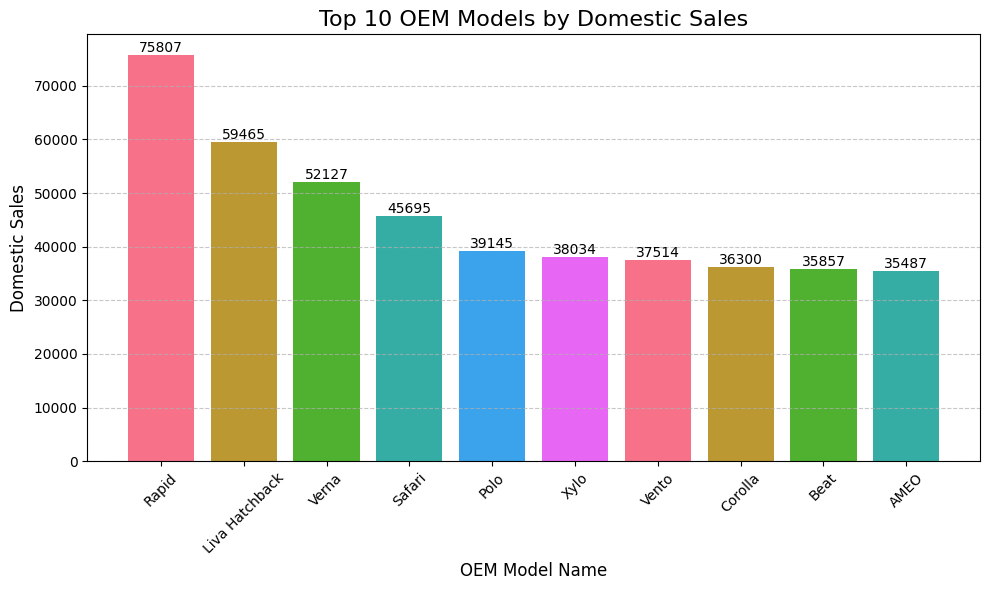

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Domestic Sale' to numeric
df['Domestic Sale'] = pd.to_numeric(df['Domestic Sale'], errors='coerce')

# Group by OEM Model Name and sort for top 10, dropping any missing values
top_oem_sales = df.dropna(subset=['OEM Model Name', 'Domestic Sale']).groupby('OEM Model Name')['Domestic Sale'].sum().sort_values(ascending=False).head(10)

# Set a color palette
sns.set_palette("husl")  # You can choose other palettes like "Set2", "pastel", etc.

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(top_oem_sales.index, top_oem_sales, color=sns.color_palette())

plt.title('Top 10 OEM Models by Domestic Sales', fontsize=16)
plt.xlabel('OEM Model Name', fontsize=12)
plt.ylabel('Domestic Sales', fontsize=12)
plt.xticks(rotation=45)

# Add data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Remove grid lines for a cleaner look
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()  # Adjust layout to make room for labels
plt.show()


### **Insights**
1. Rapid has the highest domestic sales among the top 10 models.
2. Verna and Liva Hatchback have the second and third highest domestic sales.
3. There is a significant drop in sales after the top 3 models.
4. The remaining models have relatively similar sales figures.

### Export Sales Share by Category

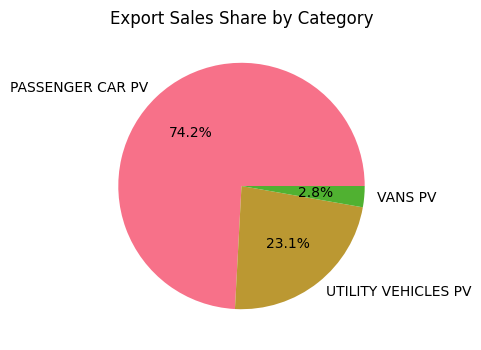

In [ ]:
# Convert 'Export Sale' to numeric
df['Export Sale'] = pd.to_numeric(df['Export Sale'], errors='coerce')

# Group by Category Name and sum, dropping any missing values
export_category_share = df.dropna(subset=['Category Name', 'Export Sale']).groupby('Category Name')['Export Sale'].sum()

# Plot
export_category_share.plot(kind='pie', autopct='%1.1f%%', figsize=(4, 4))
plt.title('Export Sales Share by Category')
plt.ylabel('')
plt.show()


### Domestic vs. Export Sales Comparison by Year

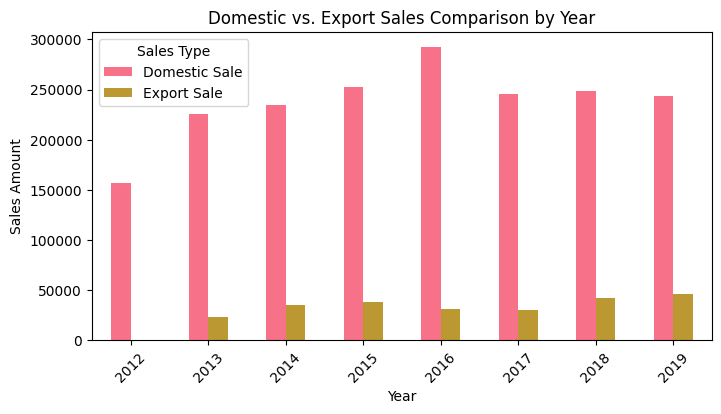

In [ ]:
# Group by Year and sum Domestic and Export Sales
sales_comparison = df.dropna(subset=['Year', 'Domestic Sale', 'Export Sale']).groupby('Year')[['Domestic Sale', 'Export Sale']].sum()

# Plot
sales_comparison.plot(kind='bar', figsize=(8, 4))
plt.title('Domestic vs. Export Sales Comparison by Year')
plt.xlabel('Year')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.legend(title='Sales Type')
plt.show()


### **Insights**
1. Domestic sales have been consistently higher than export sales across all years.
2. Both domestic and export sales have shown an increasing trend over the years.
3. The gap between domestic and export sales has increased over time.

###Yearly Sales Growth Rate

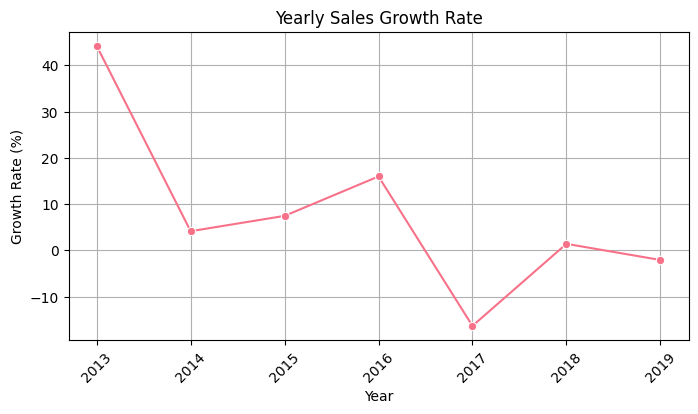

In [ ]:
# Assuming df is your original DataFrame containing the sales data

# First, ensure that 'Year' is in the correct format (if it's not already)
df['Year'] = pd.to_datetime(df['YrMth']).dt.year  # Adjust this line if 'Year' is already in a different format

# Group by 'Year' and sum the 'Domestic Sale'
yearly_sales = df.groupby('Year')['Domestic Sale'].sum().reset_index()

# Calculate year-over-year growth
yearly_sales['Growth Rate'] = yearly_sales['Domestic Sale'].pct_change() * 100

# Plot
plt.figure(figsize=(8, 4))
sns.lineplot(data=yearly_sales, x='Year', y='Growth Rate', marker='o')
plt.title('Yearly Sales Growth Rate')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=45)
plt.grid()
plt.show()


### **Insights**
1. Sales growth was highest in 2013.
2. Sales growth declined significantly in 2014 and 2017.
3. There was a recovery in sales growth in 2016 and 2018.
4. Sales growth was negative in 2017.

### Production Quantity vs. Domestic Sales (Highlights Anomalies)

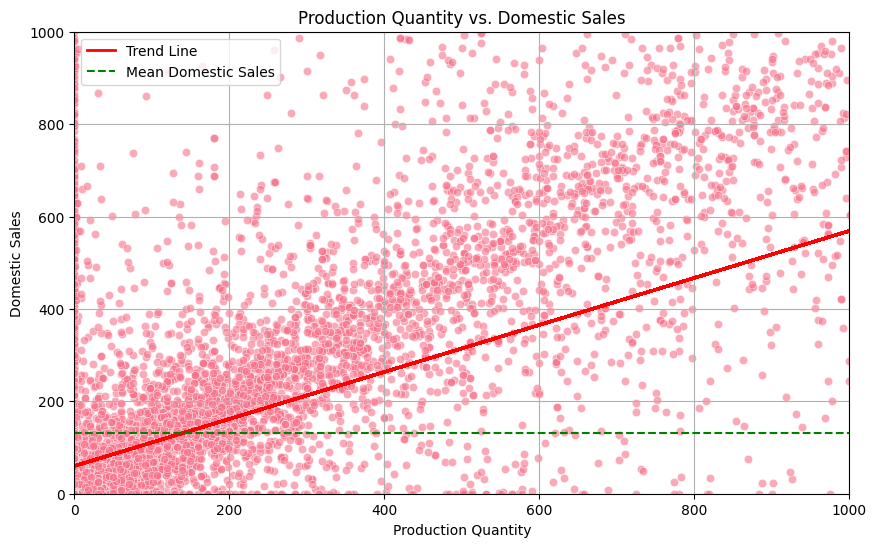

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Remove commas from 'Production Qty' and 'Domestic Sale' and convert to numeric
df['Production Qty'] = pd.to_numeric(df['Production Qty'].astype(str).str.replace(',', ''))
df['Domestic Sale'] = pd.to_numeric(df['Domestic Sale'].astype(str).str.replace(',', ''))

# Drop rows with missing values in Production Qty and Domestic Sale
scatter_data = df.dropna(subset=['Production Qty', 'Domestic Sale'])

# Prepare the data for linear regression
X = scatter_data[['Production Qty']]
y = scatter_data['Domestic Sale']

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Calculate mean of Domestic Sales for reference line
mean_sales = scatter_data['Domestic Sale'].mean()

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=scatter_data, x='Production Qty', y='Domestic Sale', alpha=0.6)
plt.plot(X, y_pred, color='red', label='Trend Line', linewidth=2)
plt.axhline(y=mean_sales, color='green', linestyle='--', label='Mean Domestic Sales', linewidth=1.5)

# Set x and y axis limits
plt.xlim(0, 1000)  # Limit x-axis from 0 to 1000
plt.ylim(0, 1000)  # Limit y-axis from 0 to 1000

plt.title('Production Quantity vs. Domestic Sales')
plt.xlabel('Production Quantity')
plt.ylabel('Domestic Sales')
plt.grid()
plt.legend()
plt.show()



### **Insights**
1. There is a positive correlation between production quantity and domestic sales.
2. As production quantity increases, domestic sales also increase.
3. The trend line shows a linear relationship between the two variables.
4. The mean domestic sales line indicates the average sales level across all production quantities.

### **Total Sales by SIAM Segment 1**

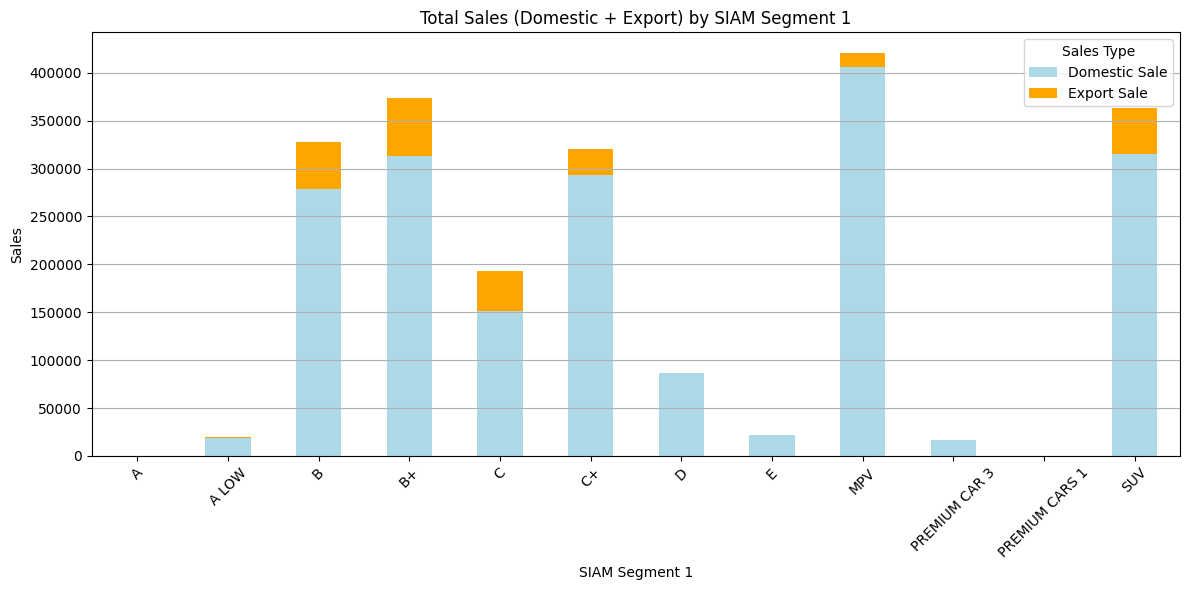

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Domestic Sale' and 'Export Sale' are numeric
df['Domestic Sale'] = pd.to_numeric(df['Domestic Sale'], errors='coerce')
df['Export Sale'] = pd.to_numeric(df['Export Sale'], errors='coerce')

# Drop rows with NaN in 'Segment 1', 'Domestic Sale', or 'Export Sale'
df.dropna(subset=['SIAM Segment 1', 'Domestic Sale', 'Export Sale'], inplace=True)

# Group by Segment 1 and sum Domestic and Export Sales
segment_sales = df.groupby('SIAM Segment 1')[['Domestic Sale', 'Export Sale']].sum().reset_index()

# Prepare data for plotting
segment_sales.set_index('SIAM Segment 1', inplace=True)

# Plotting
plt.figure(figsize=(12, 6))
segment_sales.plot(kind='bar', stacked=True, color=['lightblue', 'orange'], ax=plt.gca())
plt.title('Total Sales (Domestic + Export) by SIAM Segment 1')
plt.xlabel('SIAM Segment 1')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(title='Sales Type')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### **Insights**
1. Domestic sales are significantly higher than export sales for most segments.
2. Segments B+, C+, and SUV have the highest total sales.
3. Segments A, A-Low, E, and MPV have relatively lower sales.
4. Export sales are higher for segments C+, D, and Premium Cars 1.

### Total Sales by Category

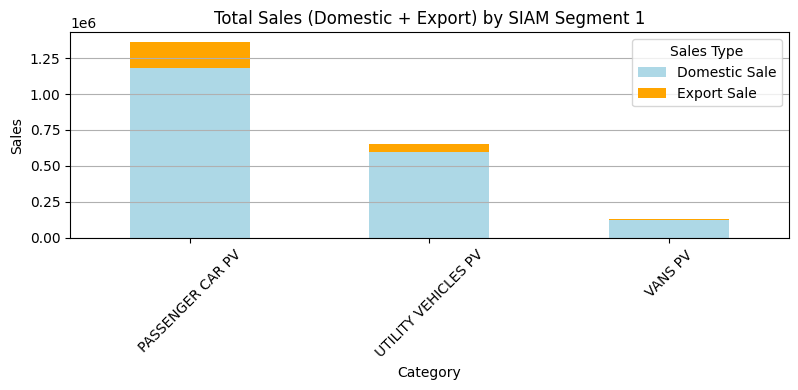

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Domestic Sale' and 'Export Sale' are numeric
df['Domestic Sale'] = pd.to_numeric(df['Domestic Sale'], errors='coerce')
df['Export Sale'] = pd.to_numeric(df['Export Sale'], errors='coerce')

# Drop rows with NaN in 'Segment 1', 'Domestic Sale', or 'Export Sale'
df.dropna(subset=['Category Name', 'Domestic Sale', 'Export Sale'], inplace=True)

# Group by Segment 1 and sum Domestic and Export Sales
segment_sales = df.groupby('Category Name')[['Domestic Sale', 'Export Sale']].sum().reset_index()

# Prepare data for plotting
segment_sales.set_index('Category Name', inplace=True)

# Plotting
plt.figure(figsize=(8, 4))
segment_sales.plot(kind='bar', stacked=True, color=['lightblue', 'orange'], ax=plt.gca())
plt.title('Total Sales (Domestic + Export) by SIAM Segment 1')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(title='Sales Type')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### **Insights**
1. Passenger Cars have the highest total sales.
2. Utility Vehicles have a significant presence but lower than Passenger Cars.
3. Vans have the lowest sales.
4. Export sales are a small portion of the total sales for all segments.

### **Step 4: Sales Forecasting**

## **Weighted Moving Average**

### **Based on Category**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.relativedelta import relativedelta

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Ensure 'Year Month' is in datetime format
df['Year Month'] = pd.to_datetime(df['YrMth'])

# Aggregate data by month and category
monthly_sales = df.groupby(['Year Month', 'Category Name'])['Domestic Sale'].sum().reset_index()

# Create a pivot table for easier analysis
pivot_sales = monthly_sales.pivot(index='Year Month', columns='Category Name', values='Domestic Sale').fillna(0)

In [ ]:
def forecast_sales(data, months_to_forecast=6):
    predictions = []

    # Explicitly define the starting point for the forecast
    start_year = 2020
    start_month = 1  # January

    # Loop through each category
    for category in data.columns:
        if category == 'Year Month':
            continue

        # Prepare the data for linear regression
        category_data = data[category].reset_index()
        category_data['Month'] = np.arange(len(category_data))  # Numeric month index

        # Fit a linear regression model
        model = LinearRegression()
        model.fit(category_data[['Month']], category_data[category])

        # Forecast for the next `months_to_forecast`
        for i in range(months_to_forecast):
            next_month_index = len(category_data) + i

            # Calculate the Year Month for forecasted data
            forecast_date = pd.Timestamp(year=start_year, month=start_month, day=1) + relativedelta(months=i)
            predicted_sales = model.predict([[next_month_index]])[0]
            predictions.append({
                'Year Month': forecast_date.strftime('%Y-%m'),
                'Category Name': category,
                'Predicted Sales': predicted_sales
            })

    return pd.DataFrame(predictions)


In [ ]:
# Call the forecast function for the next 6 months
predicted_sales_df = forecast_sales(pivot_sales)

# Separate the predicted sales into different DataFrames by category
passenger_cars_df = predicted_sales_df[predicted_sales_df['Category Name'] == 'PASSENGER CAR PV']
utility_vehicles_df = predicted_sales_df[predicted_sales_df['Category Name'] == 'UTILITY VEHICLES PV']
vans_df = predicted_sales_df[predicted_sales_df['Category Name'] == 'VANS PV']

# Display the DataFrames
print("Predicted Sales for PASSENGER CAR PV:")
print(passenger_cars_df[['Year Month', 'Predicted Sales']].reset_index(drop=True))

print("\nPredicted Sales for UTILITY VEHICLES PV:")
print(utility_vehicles_df[['Year Month', 'Predicted Sales']].reset_index(drop=True))

print("\nPredicted Sales for VANS PV:")
print(vans_df[['Year Month', 'Predicted Sales']].reset_index(drop=True))


Predicted Sales for PASSENGER CAR PV:
  Year Month  Predicted Sales
0    2020-01     11093.204067
1    2020-02     11059.582465
2    2020-03     11025.960864
3    2020-04     10992.339262
4    2020-05     10958.717660
5    2020-06     10925.096058

Predicted Sales for UTILITY VEHICLES PV:
  Year Month  Predicted Sales
0    2020-01      9671.467742
1    2020-02      9741.188058
2    2020-03      9810.908373
3    2020-04      9880.628689
4    2020-05      9950.349005
5    2020-06     10020.069321

Predicted Sales for VANS PV:
  Year Month  Predicted Sales
0    2020-01      1208.995091
1    2020-02      1205.875563
2    2020-03      1202.756035
3    2020-04      1199.636507
4    2020-05      1196.516979
5    2020-06      1193.397452


### **Insights**
1. Passenger Cars PV are predicted to have a slight decline in sales from January to June 2020.
2. Utility Vehicles PV are predicted to have a slight increase in sales from January to June 2020.
3. Vans PV are predicted to have a very slight decline in sales from January to June 2020.
4. Overall, the predicted sales for all three categories show a relatively stable trend with minimal fluctuations.

### **Based on SIAM Segment 1**

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from dateutil.relativedelta import relativedelta

In [ ]:
# Convert 'Year Month' to datetime if not already done
df['Year Month'] = pd.to_datetime(df['Year Month'])

# Group by 'Year Month' and 'SIAM Segment 1' to sum up sales
monthly_sales = df.groupby(['Year Month', 'SIAM Segment 1']).agg({'Domestic Sale': 'sum'}).reset_index()


In [ ]:

# Function to forecast sales for a specific segment
def forecast_sales(segment_data):
    # Create a numeric month index
    segment_data['Month'] = (segment_data['Year Month'].dt.year - segment_data['Year Month'].dt.year.min()) * 12 + segment_data['Year Month'].dt.month

    # Fit the linear regression model
    model = LinearRegression()
    model.fit(segment_data[['Month']], segment_data['Domestic Sale'])

    # Prepare to store predictions
    future_dates = []
    predicted_sales = []

    # Forecast for the next 6 months (Jan to June 2020)
    for i in range(1, 7):
        future_date = pd.Timestamp(year=2020, month=i, day=1)
        month_index = segment_data['Month'].max() + i  # Increment the month index
        predicted_sale = model.predict([[month_index]])[0]

        future_dates.append(future_date.strftime('%Y-%m'))
        predicted_sales.append(predicted_sale)

    return pd.DataFrame({'Year Month': future_dates, 'Predicted Sales': predicted_sales})

# Forecast sales for each segment and store results in separate DataFrames
forecast_results = {}
segments = df['SIAM Segment 1'].unique()

for segment in segments:
    segment_data = monthly_sales[monthly_sales['SIAM Segment 1'] == segment]
    segment_forecast = forecast_sales(segment_data)
    forecast_results[segment] = segment_forecast

# Display each segment's forecast in a separate table
for segment, forecast_df in forecast_results.items():
    print(f"\nForecast for {segment}:")
    print(forecast_df)



Forecast for SUV:
  Year Month  Predicted Sales
0    2020-01      5909.769230
1    2020-02      5970.392142
2    2020-03      6031.015054
3    2020-04      6091.637966
4    2020-05      6152.260878
5    2020-06      6212.883790

Forecast for PREMIUM CAR 3:
  Year Month  Predicted Sales
0    2020-01       247.704475
1    2020-02       249.479201
2    2020-03       251.253928
3    2020-04       253.028654
4    2020-05       254.803381
5    2020-06       256.578108

Forecast for MPV:
  Year Month  Predicted Sales
0    2020-01      4561.747076
1    2020-02      4566.470411
2    2020-03      4571.193747
3    2020-04      4575.917082
4    2020-05      4580.640417
5    2020-06      4585.363753

Forecast for D:
  Year Month  Predicted Sales
0    2020-01       265.762262
1    2020-02       249.823943
2    2020-03       233.885624
3    2020-04       217.947305
4    2020-05       202.008986
5    2020-06       186.070667

Forecast for E:
  Year Month  Predicted Sales
0    2020-01       192.167999

### **Insights**
1. SUV and C+ segments are predicted to have a steady increase in sales over the next 6 months.

2. PREMIUM CAR 3, D, E, and C segments are predicted to have a slight decline in sales over the next 6 months.

3. MPV, B+,, B, and A-LOW segments are predicted to have a relatively stable trend with minimal fluctuations.

4. A and PREMIUM CARS 1 are predicted to have negligible sales over the next 6 months.